In [1]:
from fastai.vision import *

In [2]:
#Dataset klasörümün path'ini oluşturuyorum.
path = Path('../input/btcimgs')
path

PosixPath('../input/btcimgs')

In [3]:
#Klasörümün içindekilere bakıyorum.
path.ls()

[PosixPath('../input/btcimgs/train'), PosixPath('../input/btcimgs/valid')]

In [4]:
tfms = get_transforms(do_flip=False,max_rotate=0.0,max_zoom=0.0,max_lighting=0.0, max_warp=0.0)

In [5]:
data = (ImageList.from_folder(path)     #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

In [6]:
data

ImageDataBunch;

Train: LabelList (2000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Decrease,Decrease,Decrease,Decrease,Decrease
Path: ../input/btcimgs;

Valid: LabelList (308 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Decrease,Decrease,Decrease,Decrease,Decrease
Path: ../input/btcimgs;

Test: None

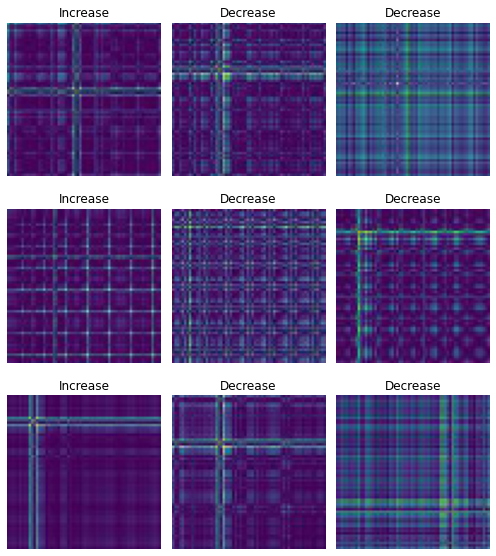

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
#class isimlerini, sayısını, training ve validation set size'larını görelim:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Decrease', 'Increase'], 2, 2000, 308)

In [27]:
learn = cnn_learner(data, models.resnet50, metrics= error_rate, model_dir="/tmp/model")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-05
Min loss divided by 10: 3.98E-05


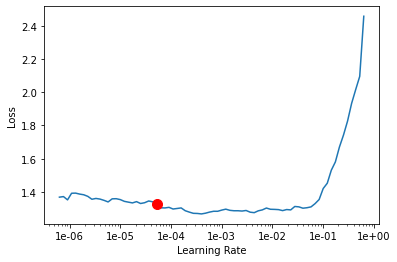

In [19]:
learn.recorder.plot(suggestion=True)

In [30]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,error_rate,time
0,3.009630,2.787983,0.522727,00:05
1,2.854184,2.522926,0.522727,00:05
2,2.699342,1.962886,0.522727,00:05
3,2.293163,1.329187,0.512987,00:04
4,1.921203,0.889287,0.503247,00:04
5,1.669144,0.757231,0.477273,00:04
6,1.451253,0.729891,0.487013,00:04
7,1.353450,0.722210,0.493506,00:04
8,1.229031,0.711759,0.506494,00:04
9,1.128526,0.700522,0.483766,00:05


In [ ]:
learn.save('stage-1',True)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn) 
losses,idxs = interp.top_losses() #
len(data.valid_ds)==len(losses)==len(idxs) #true dönmesini beklerim.

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(3e-6,1e-4))

In [ ]:
learn.save('stage-2', True)

In [ ]:
learn.export(file = Path("/kaggle/working/btcPredictor.pkl"))